In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


In [3]:
dataset = pd.read_csv('../../output/df_general.csv', sep=',')
split = 0.8
del dataset['No.']
del dataset['Protocol']
del dataset['tcp_flag_cwr']
del dataset['tcp_flag_ecn']
del dataset['tcp_flag_urg']
del dataset['ip_len']
del dataset['tcp_flag_psh']
del dataset['tcp_flag_fin']
del dataset['prebuffering']
del dataset['Time']

print(dataset.columns)

Index(['∆t', 'pkt_len', 'tcp_hea_len', 'tcp_flag_ack', 'tcp_flag_rst',
       'tcp_flag_syn', 'tcp_win_si2', 'delay', 'capture', 'stalling_event'],
      dtype='object')


(1539936, 10)
(1539936, 10)
∆t mean: 0.007086958483988943
∆t max: 45.0127
∆t min: 0.0
tcp_flag_ack
1: 0.9971320466510021
tcp_flag_rst
1: 0.0028205437940892622
tcp_flag_rst
1: 0.0028205437940892622
stalling_event
1: 0.07339980362820273


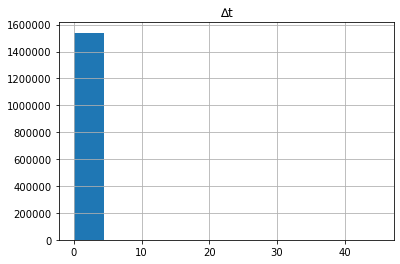

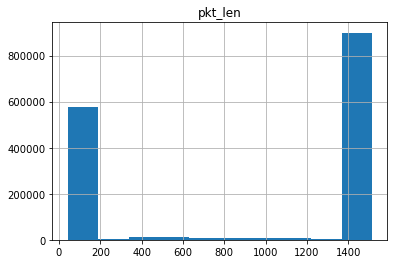

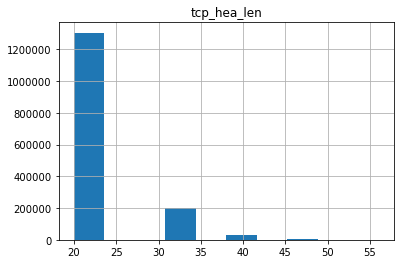

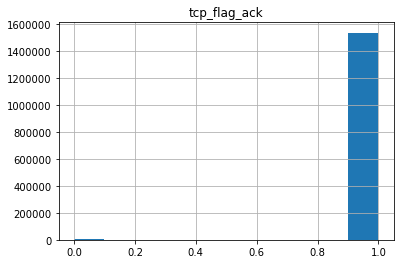

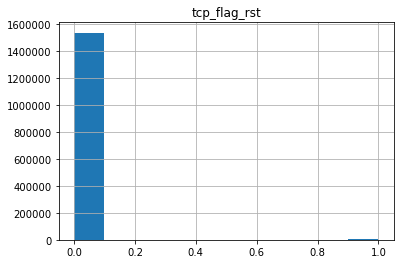

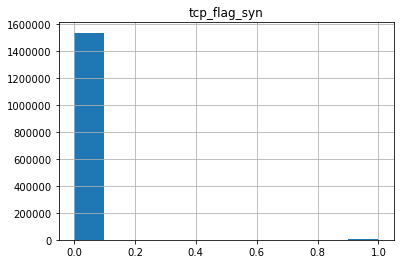

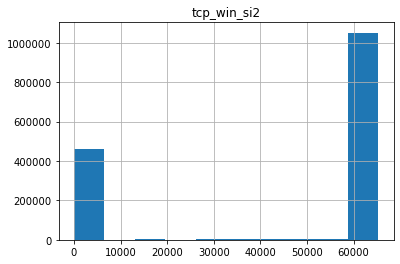

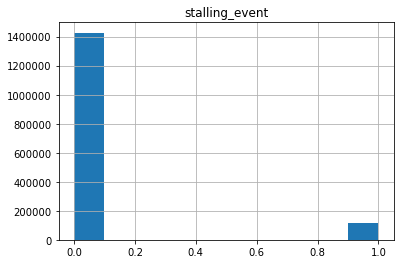

In [4]:
print(dataset.shape)

plt.figure()
hist = dataset['∆t'].hist()
plt.title('∆t')
print(dataset.shape)
print('∆t mean: '+str(dataset['∆t'].mean())+'\n∆t max: '+str(dataset['∆t'].max())+'\n∆t min: '+str(dataset['∆t'].min()))
plt.figure()
hist2 = dataset['pkt_len'].hist()
plt.title('pkt_len')
plt.figure()
hist3 = dataset['tcp_hea_len'].hist()
plt.title('tcp_hea_len')
plt.figure()
hist4 = dataset['tcp_flag_ack'].hist()
plt.title('tcp_flag_ack')
print('tcp_flag_ack\n1: '+str(dataset['tcp_flag_ack'].sum()/dataset['tcp_flag_ack'].count()))
plt.figure()
hist5 = dataset['tcp_flag_rst'].hist()
plt.title('tcp_flag_rst')
print('tcp_flag_rst\n1: '+str(dataset['tcp_flag_rst'].sum()/dataset['tcp_flag_rst'].count()))
plt.figure()
hist6 = dataset['tcp_flag_syn'].hist()
plt.title('tcp_flag_syn')
print('tcp_flag_rst\n1: '+str(dataset['tcp_flag_rst'].sum()/dataset['tcp_flag_rst'].count()))
plt.figure()
hist7 = dataset['tcp_win_si2'].hist()
plt.title('tcp_win_si2')
plt.figure()
hist11 = dataset['stalling_event'].hist()
plt.title('stalling_event')
print('stalling_event\n1: '+str(dataset['stalling_event'].sum()/dataset['stalling_event'].count())) 

In [5]:
#
X_train = [None] * (len(dataset.columns)-1)
X_test = [None] * (len(dataset.columns)-1)
y_train = [None] 
y_test = [None] 

len_rate = 0.02

grouped = dataset.groupby(['delay','capture']) 
#print(grouped.mean())

for id, data in grouped:
    spl = int(data.shape[0] * split);
    X_train = np.vstack((X_train,data.values[0:spl,:-1]))
    X_test = np.vstack((X_test,data.values[spl:,:-1]))
    y_train = np.vstack((y_train,np.reshape(data.values[0:spl,-1],(-1,1))))
    y_test = np.vstack((y_test,np.reshape(data.values[spl:,-1],(-1,1))))

X_train = X_train[1:]
X_test = X_test[1:]
y_train = y_train[1:]
y_test = y_test[1:]    

X_train = pd.DataFrame(X_train,columns=dataset.columns[:-1])
X_test = pd.DataFrame(X_test,columns=dataset.columns[:-1])
y_train = pd.DataFrame(y_train,columns=['y'])
y_test = pd.DataFrame(y_test,columns=['y'])

del X_train['delay']
del X_train['capture']
del dataset['delay']
del dataset['capture']

del X_test['delay']
del X_test['capture']

#print('X_train: '+str(len(X_train))+' | X_test: '+str(len(X_test)) + ' | y_train: '+str(len(y_train)) + '| y_test: '+str(len(y_test)))
print(X_train.columns)
#print(X_train)

Index(['∆t', 'pkt_len', 'tcp_hea_len', 'tcp_flag_ack', 'tcp_flag_rst',
       'tcp_flag_syn', 'tcp_win_si2'],
      dtype='object')


In [6]:
norm = preprocessing.MinMaxScaler()
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
X_train2 = X_train[['pkt_len','tcp_hea_len','tcp_win_si2']].values
X_test2 = X_test[['pkt_len','tcp_hea_len','tcp_win_si2']].values
#print(X_test2)

X_train_norm2 = norm.fit_transform(X_train2)
X_test_norm2 = norm.transform(X_test2)
#print(X_test_std2)

X_train_norm = X_train
X_train_norm[['pkt_len','tcp_hea_len','tcp_win_si2']] = X_train_norm2
print(X_train_norm.values)

X_test_norm = X_test
X_test_norm[['pkt_len','tcp_hea_len','tcp_win_si2']] = X_test_norm2

#print(X_test_std)

[[0.00000000e+00 1.63043478e-02 3.33333333e-01 ... 0.00000000e+00
  1.00000000e+00 1.25384557e-01]
 [3.27000000e-02 1.63043478e-02 3.33333333e-01 ... 0.00000000e+00
  1.00000000e+00 9.94872580e-01]
 [2.00000000e-04 8.15217391e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.91826739e-03]
 ...
 [1.00000000e-04 1.63043478e-02 3.33333333e-01 ... 0.00000000e+00
  0.00000000e+00 3.91826739e-03]
 [2.90000000e-03 9.72826087e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.83163695e-01]
 [1.00000000e-04 1.63043478e-02 3.33333333e-01 ... 0.00000000e+00
  0.00000000e+00 3.91826739e-03]]


In [7]:
import random 
import sklearn.metrics as metrics
for i in range(1,5):
    print('dep: '+str(i))
    rfc = RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(X_train_norm.values,y_train.values.astype('int'))
    y_pred = rfc.predict(X_test_norm.values)
    print(metrics.confusion_matrix(y_test.values.astype('int'),y_pred))
    print(metrics.precision_score(y_test.values.astype('int'),y_pred))
    print(metrics.recall_score(y_test.values.astype('int'),y_pred))
    print(metrics.f1_score(y_test.values.astype('int'),y_pred))
    print(metrics.accuracy_score(y_test.values.astype('int'),y_pred))
    

dep: 1
[[301412      0]
 [  6600      0]]
0.0
0.0
0.0
0.9785722634183084
dep: 2
[[301412      0]
 [  6600      0]]
0.0
0.0
0.0
0.9785722634183084
dep: 3
[[301412      0]
 [  6600      0]]
0.0
0.0
0.0
0.9785722634183084
dep: 4
[[301412      0]
 [  6600      0]]
0.0
0.0
0.0
0.9785722634183084


c:\users\usuario\pycharmprojects\stallingevents\venv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\usuario\pycharmprojects\stallingevents\venv\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\usuario\pycharmprojects\stallingevents\venv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\usuario\pycharmprojects\stallingevents\venv\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being

(1231924, 7)
(1231924, 1)
(2250986, 7)
(2250986,)
[[0.00000000e+00 1.63043478e-02 3.33333333e-01 ... 0.00000000e+00
  1.00000000e+00 1.25384557e-01]
 [3.27000000e-02 1.63043478e-02 3.33333333e-01 ... 0.00000000e+00
  1.00000000e+00 9.94872580e-01]
 [2.00000000e-04 8.15217391e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.91826739e-03]
 ...
 [0.00000000e+00 2.17391304e-02 5.55555556e-01 ... 0.00000000e+00
  0.00000000e+00 3.91826739e-03]
 [5.50000000e-03 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 9.88581924e-01]
 [1.00000000e-04 8.15217391e-03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 3.91826739e-03]]


c:\users\usuario\pycharmprojects\stallingevents\venv\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<function matplotlib.pyplot.show(*args, **kw)>

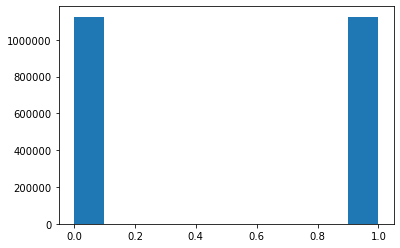

In [8]:
from imblearn.over_sampling import SMOTE,ADASYN
print(X_train_norm.shape)
print(y_train.shape)
X_train_norm_res, y_train_res= SMOTE().fit_resample(X_train_norm.values,y_train.values.astype('int'))

print(X_train_norm_res.shape)
print(y_train_res.shape)

print(X_train_norm_res)

plt.figure()
plt.hist(y_train_res)
plt.show


In [9]:
import random 
import sklearn.metrics as metrics
for i in range(1,5):
    print('dep: '+str(i))
    rfc = RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(X_train_norm_res,y_train_res)
    y_pred = rfc.predict(X_test_norm.values)
    print(metrics.confusion_matrix(y_test.values.astype('int'),y_pred))
    print(metrics.precision_score(y_test.values.astype('int'),y_pred))
    print(metrics.recall_score(y_test.values.astype('int'),y_pred))
    print(metrics.f1_score(y_test.values.astype('int'),y_pred))
    print(metrics.accuracy_score(y_test.values.astype('int'),y_pred))
    

dep: 1
[[179497 121915]
 [  3640   2960]]
0.023703703703703703
0.4484848484848485
0.04502757178170754
0.5923697778008649
dep: 2
[[180166 121246]
 [  3643   2957]]
0.023807798523385104
0.44803030303030306
0.04521303028218008
0.5945320312195629
dep: 3
[[223941  77471]
 [  5210   1390]]
0.017625949455370844
0.2106060606060606
0.03252945788137279
0.7315656532862356
dep: 4
[[224396  77016]
 [  5220   1380]]
0.01760293892545538
0.20909090909090908
0.03247211633488635
0.7330104021921224


In [29]:
from imblearn.under_sampling import TomekLinks
X_train_norm['y'] = y_train

c0,c1 = X_train_norm.y.value_counts()
print(c0)
print(c1)
df_0 = X_train_norm[X_train_norm.y==0]
df_1 = X_train_norm[X_train_norm.y==1]

df_0_under = df_0.sample(c1)
print(df_0_under)
df_train_under = pd.concat([df_0_under,df_1],axis=0)
print(df_train_under.y.value_counts())
print(df_train_under)

y_train_rand = pd.DataFrame(df_train_under.y)
del df_train_under['y']

1125493
106431
             ∆t   pkt_len  tcp_hea_len  tcp_flag_ack  tcp_flag_rst  \
750082   0.0016  1.000000     0.000000           1.0           0.0   
1018020  0.0000  1.000000     0.000000           1.0           0.0   
378720   0.0001  0.016304     0.333333           1.0           0.0   
240636   0.0001  0.008152     0.000000           1.0           0.0   
812543   0.0001  0.021739     0.555556           1.0           0.0   
...         ...       ...          ...           ...           ...   
1010666  0.0000  1.000000     0.000000           1.0           0.0   
802108   0.0015  1.000000     0.000000           1.0           0.0   
789226   0.0000  0.016304     0.333333           1.0           0.0   
943755   0.0002  0.008152     0.000000           1.0           0.0   
704691   0.0307  1.000000     0.000000           1.0           0.0   

         tcp_flag_syn  tcp_win_si2  y  
750082            0.0     0.988597  0  
1018020           0.0     0.988551  0  
378720            0.0   

In [30]:
df_train_under = df_train_under.fillna(df_train_under.mean())
print(y_train_rand.y.value_counts())
for i in range(1,5):
    print('dep: '+str(i))
    rfc = RandomForestClassifier(max_depth=i, random_state=0)
    rfc.fit(df_train_under.values,y_train_rand.values.astype('int'))
    y_pred = rfc.predict(X_test_norm.values)
    print(metrics.confusion_matrix(y_test.values.astype('int'),y_pred))
    print(metrics.precision_score(y_test.values.astype('int'),y_pred))
    print(metrics.recall_score(y_test.values.astype('int'),y_pred))
    print(metrics.f1_score(y_test.values.astype('int'),y_pred))
    print(metrics.accuracy_score(y_test.values.astype('int'),y_pred))
    

1.0    106431
0.0    106431
Name: y, dtype: int64
dep: 1
[[183793 117619]
 [  3680   2920]]
0.024224524842582067
0.44242424242424244
0.04593397777235938
0.6061874212693011
dep: 2
[[180637 120775]
 [  3646   2954]]
0.023874758544884384
0.44757575757575757
0.0453314304567671
0.59605145254081
dep: 3
[[224614  76798]
 [  5227   1373]]
0.017564058282483273
0.20803030303030304
0.03239315331894162
0.7336954404373855
dep: 4
[[232498  68914]
 [  5228   1372]]
0.019520245852659136
0.20787878787878789
0.03568920219545821
0.7592885991454879


c:\users\usuario\pycharmprojects\stallingevents\venv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\usuario\pycharmprojects\stallingevents\venv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\usuario\pycharmprojects\stallingevents\venv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
c:\users\usuario\pycharmprojects\stallingevents\venv\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

In [41]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

stdScal = StandardScaler()
X_train_std = stdScal.fit_transform(X_train.values)
X_test_std = stdScal.transform(X_test.values)

X_test_stdY = pd.DataFrame([X_test_std,y_test])
X_train_stdY = pd.DataFrame([X_train_std,y_train])

pca = PCA(n_components=2)


X_pca_prev = pd.DataFrame([X_train_norm,y_train])
X_pca = pca.fit_transform(X_pca_prev)
print(X_pca)
print(y_pca)
plot_2d_space(X_pca,y_pca,'Title')

ValueError: operands could not be broadcast together with shapes (308012,7) (8,) (308012,7) 